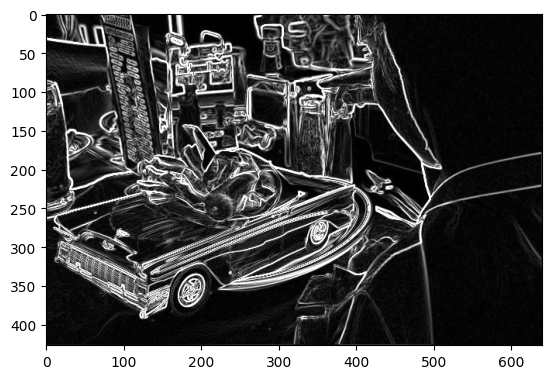

In [13]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

fn = "images/000000558840.jpg"

def sobelOperator(img):
    container = np.copy(img)
    size = container.shape
    for i in range(1, size[0] - 1):
        for j in range(1, size[1] - 1):
            gx = (img[i - 1][j - 1] + 2*img[i][j - 1] + img[i + 1][j - 1]) - (img[i - 1][j + 1] + 2*img[i][j + 1] + img[i + 1][j + 1])
            gy = (img[i - 1][j - 1] + 2*img[i - 1][j] + img[i - 1][j + 1]) - (img[i + 1][j - 1] + 2*img[i + 1][j] + img[i + 1][j + 1])
            # sets edgeds to 255
            container[i][j] = min(255, np.sqrt(gx**2 + gy**2))
    return container
    pass

img = cv2.cvtColor(cv2.imread(fn), cv2.COLOR_BGR2GRAY)
img = sobelOperator(img)
img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
plt.imshow(img)
plt.show()

dataset 1, task 3 weights

In [8]:
kernel_x, kernel_y = [1.3027, 2.3126, 1.2991], [0.9910, 1.9917, 0.9826]

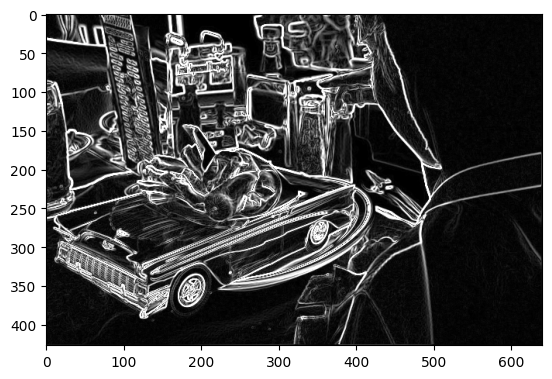

In [14]:
def sobelOperator(img):
    container = np.copy(img)
    size = container.shape
    for i in range(1, size[0] - 1):
        for j in range(1, size[1] - 1):
            gx = (kernel_x[0] * img[i - 1][j - 1] + kernel_x[1]*img[i][j - 1] + kernel_x[2]*img[i + 1][j - 1]) - (kernel_x[0]*img[i - 1][j + 1] + kernel_x[1]*img[i][j + 1] + kernel_x[2]*img[i + 1][j + 1])
            gy = (kernel_y[0]*img[i - 1][j - 1] + kernel_y[1]*img[i - 1][j] + kernel_y[2]*img[i - 1][j + 1]) - (kernel_y[0]*img[i + 1][j - 1] + kernel_y[1]*img[i + 1][j] + kernel_y[2]*img[i + 1][j + 1])
            # sets edgeds to 255
            container[i][j] = min(255, np.sqrt(gx**2 + gy**2))
    return container
    pass

img = cv2.cvtColor(cv2.imread(fn), cv2.COLOR_BGR2GRAY)
img = sobelOperator(img)
img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
plt.imshow(img)
plt.show()

https://github.com/Altron01/Sobel-operator-Edge-Detection/blob/master/sobelOperator.py

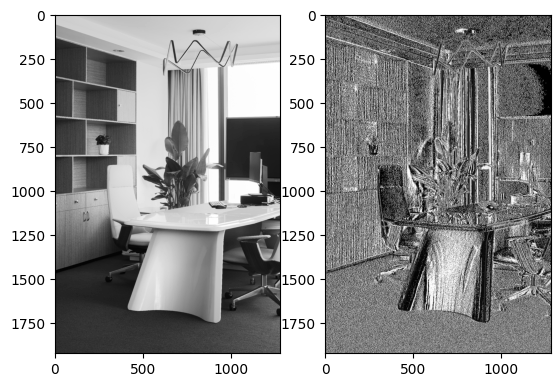

In [10]:
from scipy import ndimage
import matplotlib.pyplot as plt

fig = plt.figure()

plt.gray()  # show the filtered result in grayscale

ax1 = fig.add_subplot(121)  # left side

ax2 = fig.add_subplot(122)  # right side

img = cv2.cvtColor(cv2.imread("idea.jpg"), cv2.COLOR_BGR2GRAY)
ascent = img

result = ndimage.sobel(ascent)
#result = cv2.cvtColor(result, cv2.COLOR_GRAY2RGB)
ax1.imshow(ascent)

ax2.imshow(result)

plt.show()


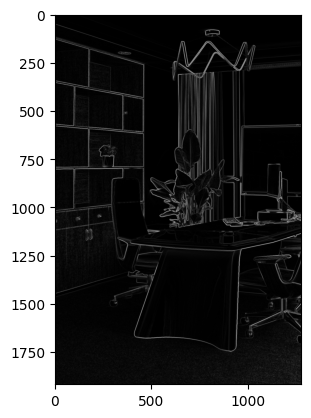

In [12]:
import torch
import numpy as np
from matplotlib import pyplot as plt
import cv2
import torch.nn.functional as F
from torchvision.transforms import GaussianBlur

kernel_v = [[1, 0, -1],
            [2, 0, -2],
            [1, 0, -1]]
kernel_h = [[1, 2, 1],
            [0, 0, 0],
            [-1, -2, -1]]
kernel_h = torch.FloatTensor(kernel_h).unsqueeze(0).unsqueeze(0)
kernel_v = torch.FloatTensor(kernel_v).unsqueeze(0).unsqueeze(0)
img = cv2.cvtColor(cv2.imread("idea.jpg"), cv2.COLOR_BGR2GRAY)
img = img.astype(np.float32)
img = torch.from_numpy(img).unsqueeze(0)
img = GaussianBlur(kernel_size=3, sigma=(0.1, 2.0))(img)
x_v = F.conv2d(img, kernel_v)
x_h = F.conv2d(img, kernel_h)
img = torch.sqrt(torch.pow(x_v, 2) + torch.pow(x_h, 2) + 1e-6)
img = img.squeeze(0)
plt.imshow(img, cmap = 'gray')
plt.show()